In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [ ]:
# import data
data_set = np.genfromtxt("hw08_data_set.csv", delimiter = ",")
initial_centroids = np.genfromtxt("hw08_initial_centroids.csv", delimiter = ",")

In [ ]:
# print initial centroids
# print(initial_centroids)

In [ ]:
# helper function for initializing the H matrix
def initialize_H_matrix(X, initial_means, K):
  returned_matrix = np.zeros((len(data_set), K))

  for i in range(len(data_set[:,0])):
    min_dist = np.Infinity
    min_arg = 0
    for j in range(K):
      dist = np.linalg.norm(X[i] - initial_centroids[j])
      if (dist < min_dist):
        min_dist = dist
        min_arg = j
    for j in range(K):
      if (min_arg == j):
        returned_matrix[i, j] = 1

  return returned_matrix

In [ ]:
# helper function for retrieving new means
def get_new_means(H, X, K):
  returned_matrix = np.zeros((K, len(X[0, :])))
  for k in range(K):
    x_sum = 0
    h_sum = 0
    for i in range(len(H[:, 0])):
      x_sum += (H[i, k] * X[i])
      h_sum += H[i, k]
    x_sum /= h_sum
    returned_matrix[k] = x_sum
  
  return returned_matrix

In [ ]:
# helper functino for retrieving gaussian probability
def get_gaussian_prob(x, mean, covariance_matrix, D):
  det_cov = np.linalg.det(covariance_matrix)
  first = 1 / math.sqrt((2 * math.pi)**D * det_cov)
  x_minus_mean_transpose = x - mean
  x_minus_mean_transpose = np.reshape(x_minus_mean_transpose, [1, D])
  x_minus_mean_normal = np.reshape(x_minus_mean_transpose, [D, 1])
  cov_inv = np.linalg.inv(covariance_matrix)
  first_matmul = np.matmul(cov_inv, x_minus_mean_normal)
  second_matmul = np.matmul(x_minus_mean_transpose, first_matmul)
  exp_within = -0.5 * second_matmul
  second = np.exp(exp_within)
  result = first * second
  return result

In [ ]:
# define helper function for retrieving new H matrix
def get_new_H_matrix(X, covariance_matrices, means, prior_probabilities, K):

  returned_matrix = np.zeros((len(X[:, 0]), K))

  #identity = np.identity(2)
  for i in range(len(X[:, 0])):
    xi = np.reshape(np.array(X[i]), [2,1])
    denom_sum = 0
    for k in range(K):
      mean = np.reshape(np.array(means[k]), [2,1])
      covariance_matrix = covariance_matrices[k]
      prior_probability = prior_probabilities[k]
      denom = get_gaussian_prob(xi, mean, covariance_matrix, len(X[0, :]))
      denom *= prior_probability
      denom_sum += denom
    for k in range(K):
      mean = np.reshape(np.array(means[k]), [2,1])
      covariance_matrix = covariance_matrices[k]
      prior_probability = prior_probabilities[k]
      above_value = get_gaussian_prob(xi, mean, covariance_matrix, len(X[0, :])) * prior_probability
      result = above_value / denom_sum
      returned_matrix[i, k] = result
  
  return returned_matrix


In [ ]:
# define helper function for retrieving covariance matrices
def get_new_covariance_matrix(H, X, means, K):

  returned_array = [];
  D = len(X[0, :])

  for k in range(K):
    mean = np.reshape(means[k], [D,1])
    cov_sum = 0
    h_sum = 0

    for i in range(len(H[:, 0])):
      h_sum += H[i, k]

    for i in range(len(H[:, 0])):
      hik = H[i, k]
      xi = np.reshape(X[i], [D,1])
      xi_minus_mean = xi - mean
      cov_sum += (hik * np.matmul(xi_minus_mean, xi_minus_mean.T))

    cov_sum /= h_sum
    returned_array.append(cov_sum)

  return returned_array


In [ ]:
# define helper function for retrieving prior probabilities
def get_new_prior_probabilities(H, K):
  returned_priors = np.zeros(K)
  N = len(H[:, 0])
  
  for i in range(N):
    for j in range(K):
      returned_priors[j] += H[i, j]

  returned_priors /= N

  return returned_priors

In [ ]:
# retrieve initial covariance matrices and prior probabilities
K = 9
initial_H_matrix = initialize_H_matrix(data_set, initial_centroids, K)
initial_prior_probabilities = get_new_prior_probabilities(initial_H_matrix, K)
initial_means = get_new_means(initial_H_matrix, data_set, K)
initial_cov_matrices = get_new_covariance_matrix(initial_H_matrix, data_set, initial_means, K)

print("initial H matrices:")
print(initial_H_matrix)
print("initial prior probabilities:")
print(initial_prior_probabilities)
print("initial means:")
print(initial_means)
print("initial covariance matrices:")
print(initial_cov_matrices)

initial H matrices:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
initial prior probabilities:
[0.1   0.117 0.067 0.116 0.11  0.167 0.132 0.051 0.14 ]
initial means:
[[-4.50815151 -4.30069559]
 [-4.57677197 -0.0877862 ]
 [-2.98960625  2.4448081 ]
 [-0.42630284 -5.22387751]
 [ 0.44257853 -0.39828398]
 [-2.17271351  5.10262302]
 [ 5.04251068 -4.07440554]
 [ 4.10801059  0.02937853]
 [ 4.80598917  4.11690186]]
initial covariance matrices:
[array([[2.11678603, 1.34748313],
       [1.34748313, 1.85992086]]), array([[1.25670526, 0.09673495],
       [0.09673495, 1.15724092]]), array([[ 6.25409706, -2.98365243],
       [-2.98365243,  1.79778737]]), array([[2.34990354, 0.35563258],
       [0.35563258, 0.51890252]]), array([[0.50911225, 0.06365225],
       [0.06365225, 0.75997609]]), array([[ 5.52004209, -0.27592093],
       [-0.27592093,  0.36504765]]), array([[0.60976121, 0.49802431],
 

In [ ]:
# iterate the EM algorithm for 100 iterations
iterations = 100

H = initial_H_matrix
prior_probabilities = initial_prior_probabilities
means = initial_means
covariance_matrices = initial_cov_matrices

for i in range(iterations):
  H = get_new_H_matrix(data_set, covariance_matrices, means, prior_probabilities, K)
  prior_probabilities = get_new_prior_probabilities(H, K)
  means = get_new_means(H, data_set, K)
  covariance_matrices = get_new_covariance_matrix(H, data_set, means, K)
print(means)

[[-4.9508988  -4.98464367]
 [-4.85629614  0.0404331 ]
 [-4.96379877  4.984647  ]
 [ 0.02477868 -5.09014979]
 [-0.09548618 -0.116943  ]
 [-0.03701877  4.91812108]
 [ 5.00933942 -5.02595861]
 [ 4.99839618  0.13777844]
 [ 4.96705774  4.97185503]]


In [ ]:
# put original data information for plotting purposes
D = 2
original_means = np.zeros((K, len(data_set[0,:])))
original_cov_matrix = []
original_cov_matrix_0 = np.zeros((D, D))
original_cov_matrix_0[0] = [0.8, -0.6]
original_cov_matrix_0[1] = [-0.6, 0.8]
original_cov_matrix_1 = np.zeros((D, D))
original_cov_matrix_1[0] = [0.8, 0.6]
original_cov_matrix_1[1] = [0.6, 0.8]
original_cov_matrix_2 = np.zeros((D, D))
original_cov_matrix_2[0] = [0.8, -0.6]
original_cov_matrix_2[1] = [-0.6, 0.8]
original_cov_matrix_3 = np.zeros((D, D))
original_cov_matrix_3[0] = [0.8, 0.6]
original_cov_matrix_3[1] = [0.6, 0.8]
original_cov_matrix_4 = np.zeros((D, D))
original_cov_matrix_4[0] = [0.2, 0.0]
original_cov_matrix_4[1] = [0.0, 1.2]
original_cov_matrix_5 = np.zeros((D, D))
original_cov_matrix_5[0] = [1.2, 0.0]
original_cov_matrix_5[1] = [0.0, 0.2]
original_cov_matrix_6 = np.zeros((D, D))
original_cov_matrix_6[0] = [0.2, 0.0]
original_cov_matrix_6[1] = [0.0, 1.2]
original_cov_matrix_7 = np.zeros((D, D))
original_cov_matrix_7[0] = [1.2, 0.0]
original_cov_matrix_7[1] = [0.0, 0.2]
original_cov_matrix_8 = np.zeros((D, D))
original_cov_matrix_8[0] = [1.6, 0.0]
original_cov_matrix_8[1] = [0.0, 1.6]
original_cov_matrix.append(original_cov_matrix_0)
original_cov_matrix.append(original_cov_matrix_1)
original_cov_matrix.append(original_cov_matrix_2)
original_cov_matrix.append(original_cov_matrix_3)
original_cov_matrix.append(original_cov_matrix_4)
original_cov_matrix.append(original_cov_matrix_5)
original_cov_matrix.append(original_cov_matrix_6)
original_cov_matrix.append(original_cov_matrix_7)
original_cov_matrix.append(original_cov_matrix_8)
original_means[0] = [5.0, 5.0]
original_means[1] = [-5.0, 5.0]
original_means[2] = [-5.0, -5.0]
original_means[3] = [5.0, -5.0]
original_means[4] = [5.0, 0.0]
original_means[5] = [0.0, 5.0]
original_means[6] = [-5.0, 0.0]
original_means[7] = [0.0, -5.0]
original_means[8] = [0.0, 0.0]

Text(0, 0.5, 'x2')

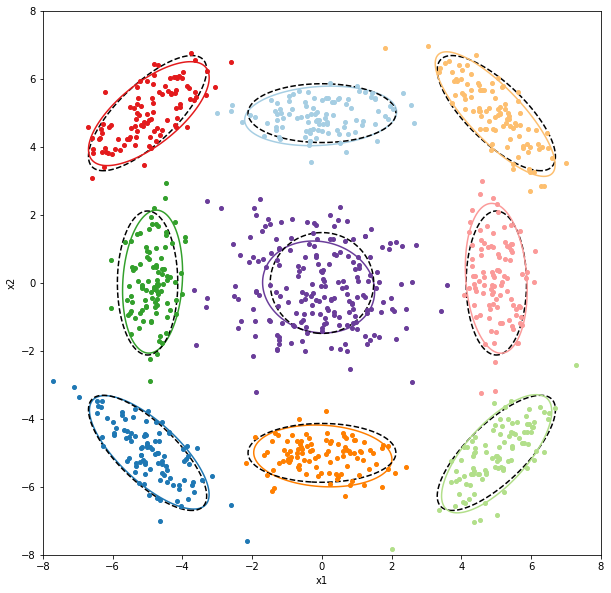

In [ ]:
# plot data points for the initial and predicted densities
point_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6"])

x1_interval = np.linspace(-8, +8, 1001)
x2_interval = np.linspace(-8, +8, 1001)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
X_grid = np.vstack((x1_grid.flatten(), x2_grid.flatten())).T

plt.figure(figsize = (10, 10))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
for k in range(K):
  cov_matrix = covariance_matrices[k]
  org_cov_matrix = original_cov_matrix[k]
  D1 = stats.multivariate_normal.pdf(X_grid, mean = means[k,:],
                                   cov = cov_matrix)
  D1 = D1.reshape((len(x1_interval), len(x2_interval)))

  D2 = stats.multivariate_normal.pdf(X_grid, mean = original_means[k,:],
                                   cov = org_cov_matrix)
  D2 = D2.reshape((len(x1_interval), len(x2_interval)))

  plt.contour(x1_grid, x2_grid, D1, levels = [0.05],
            colors = point_colors[k], linestyles = "solid")
  plt.contour(x1_grid, x2_grid, D2, levels = [0.05],
            colors = "black", linestyles = "dashed")


for i in range(len(H[:, 0])):
  xi = data_set[i]
  max_arg = np.argmax(H[i])
  plt.plot(xi[0], xi[1], marker = 'o', linestyle = "none", color = point_colors[max_arg], markersize = 4)

plt.xlabel("x1")
plt.ylabel("x2")